In [1]:
# Init
import os
import sys

module_path = os.path.abspath(os.path.join("../src/simulicronalpha/"))
if module_path not in sys.path:
    sys.path.append(module_path)

# Imports
import random
import numpy as np
import pandas as pd
import warnings
import multiprocessing

from numpy import concatenate as c

In [2]:
from popSim import (
    generateTransposon,
    generatePopulation,
    calculateFitness,
    generateGenome,
    transposition,
    runSim,
    runBatch,
    recombination,
)

In [7]:
gen = generateGenome(
    numberOfInsertionSites=1000,
    numberOfChromosomes=1,
    baseRecombinationRate=0.0,
    baseSelection=1,
)
tr, gen, TEset = generateTransposon(
    genomeArray=gen,
    NumberOfTransposonInsertions=1,
    baseExcision=0.0,
)
pop = generatePopulation(
    tr,
    InsertIntoAll=True,
    NumberOfIndividual=10,
    NumberOfTransposonInsertions=1,
    HardyWeinberg=False,
    insertionFrequency=0.5,
)

In [4]:
tr

array([[0, 0, 0, 0, 0, 0],
       ['fbb59900a3832b6299e1c6ad9d96f7', 176, 1.0, 0, 1, 1]],
      dtype=object)

In [4]:
runSim(
    genomeMatrix=gen,
    populationMatrix=pop,
    transposonMatrix=tr,
    TEset=TEset,
    NumberOfTransposonInsertions=1,
    generations=3,
)

P1raw : 7
P2raw : 7
P1 : [0 list([1]) 2.718281828459045]
P2 : [0 list([1]) 2.718281828459045]
[1, 1, 2.718281828459045, 7.38905609893065, 1, 2.718281828459045, 2.718281828459045, 2.718281828459045, 2.718281828459045, 7.38905609893065]
P1raw : 7
P2raw : 0
P1 : [0 list([1]) 2.718281828459045]
P2 : [0 0 1]
[1, 1, 2.718281828459045, 7.38905609893065, 1, 2.718281828459045, 2.718281828459045, 2.718281828459045, 2.718281828459045, 7.38905609893065]
P1raw : 9
P2raw : 3
P1 : [list([1]) list([1]) 7.38905609893065]
P2 : [list([1]) list([1]) 7.38905609893065]
[1, 1, 2.718281828459045, 7.38905609893065, 1, 2.718281828459045, 2.718281828459045, 2.718281828459045, 2.718281828459045, 7.38905609893065]
P1raw : 9
P2raw : 2
P1 : [list([1]) list([1]) 7.38905609893065]
P2 : [list([1]) 0 2.718281828459045]
[1, 1, 2.718281828459045, 7.38905609893065, 1, 2.718281828459045, 2.718281828459045, 2.718281828459045, 2.718281828459045, 7.38905609893065]
P1raw : 9
P2raw : 3
P1 : [list([1]) list([1]) 7.38905609893065]

('FIXED', [1], [], [], 4, 1.0)

In [ ]:
w = np.asarray(
    [
        1,
        2.718281828459045,
        2.718281828459045,
        7.38905609893065,
        7.38905609893065,
        1,
        1,
        2.718281828459045,
        2.718281828459045,
        2.718281828459045,
    ]
)
wMean = np.mean(w)
l1 = np.asarray(list(range(len(w))))
p1 = random.choices(l1, weights=w, k=10000000)
np.mean(p1)

In [55]:
p1 = random.choices(
    list(range((10))),
    weights=[
        1,
        2.718281828459045,
        2.718281828459045,
        7.38905609893065,
        7.38905609893065,
        1,
        1,
        2.718281828459045,
        2.718281828459045,
        2.718281828459045,
    ],
    k=10000000,
)

(array([ 318490.,       0.,  864973.,       0.,  867285.,       0.,
        2356450.,       0., 2354196.,       0.,       0.,  319469.,
              0.,  318641.,       0.,  866994.,       0.,  866638.,
              0.,  866864.]),
 array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.5 ,
        4.95, 5.4 , 5.85, 6.3 , 6.75, 7.2 , 7.65, 8.1 , 8.55, 9.  ]),
 <a list of 20 Patch objects>)

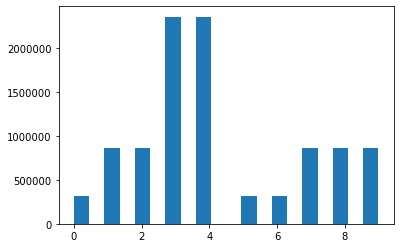

In [59]:
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.hist(p1, bins=20)
# sns.distplot(p1)

(array([ 318490.,       0.,  864973.,       0.,  867285.,       0.,
        2356450.,       0., 2354196.,       0.,       0.,  319469.,
              0.,  318641.,       0.,  866994.,       0.,  866638.,
              0.,  866864.]),
 array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.5 ,
        4.95, 5.4 , 5.85, 6.3 , 6.75, 7.2 , 7.65, 8.1 , 8.55, 9.  ]),
 <a list of 20 Patch objects>)

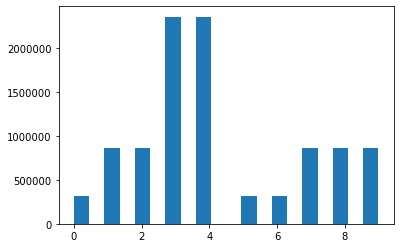

In [60]:
p2 = np.random.choice(list(range(10)), size=1000, p=w / sum(w))
plt.hist(p1, bins=20)
# sns.distplot(p2)

In [78]:
result = []
for i in range(100000):
    result = result + random.choices(
        list(range((10))),
        weights=[
            1,
            2.718281828459045,
            2.718281828459045,
            7.38905609893065,
            7.38905609893065,
            1,
            1,
            2.718281828459045,
            2.718281828459045,
            2.718281828459045,
        ],
        k=2,
    )

(array([ 6206.,     0., 17238.,     0., 17307.,     0., 47232.,     0.,
        47186.,     0.,     0.,  6387.,     0.,  6391.,     0., 17375.,
            0., 17353.,     0., 17325.]),
 array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.5 ,
        4.95, 5.4 , 5.85, 6.3 , 6.75, 7.2 , 7.65, 8.1 , 8.55, 9.  ]),
 <a list of 20 Patch objects>)

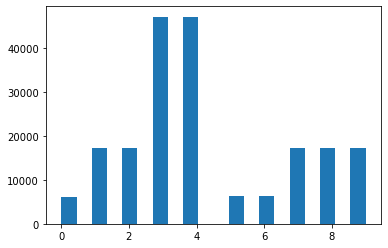

In [80]:
plt.hist(result, bins=20)

In [83]:
result = []
for i in range(100):
    result = result + random.choices(
        list(range((10))),
        weights=[
            1,
            2.718281828459045,
            2.718281828459045,
            7.38905609893065,
            7.38905609893065,
            1,
            1,
            2.718281828459045,
            2.718281828459045,
            2.718281828459045,
        ],
        k=2,
    )

(array([ 9.,  0., 11.,  0., 23.,  0., 45.,  0., 48.,  0.,  0.,  4.,  0.,
        10.,  0., 16.,  0., 14.,  0., 20.]),
 array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.5 ,
        4.95, 5.4 , 5.85, 6.3 , 6.75, 7.2 , 7.65, 8.1 , 8.55, 9.  ]),
 <a list of 20 Patch objects>)

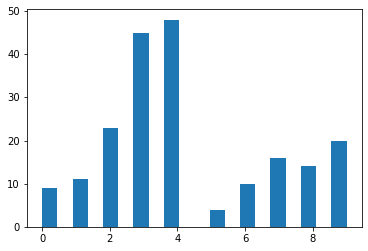

In [84]:
plt.hist(result, bins=20)

In [ ]:
result = runBatch(numberOfSimulations=1000, NumberOfIndividual=10)

In [ ]:
c1 = runBatch(numberOfGenerations=100000)
c2 = runBatch(numberOfGenerations=100000, NumberOfIndividual=100)
c3 = runBatch(numberOfGenerations=100000, NumberOfIndividual=10)

In [ ]:
columns = ["State", "Iterations", "Transpositions"]
df = pd.DataFrame([x for x in result], columns=columns)

In [ ]:
df["Transpositions"].value_counts()

In [ ]:
NumberOfSites = 1000
v1 = np.full(NumberOfSites, "M")
v2 = np.full(NumberOfSites, "F")
rates = np.random.uniform(size=(NumberOfSites - 1))

In [ ]:
%lprun -T lprof0 -f runSim runSim(gen,pop,tr)

In [ ]:
def generateTestTransposon(
    genomeArray,
    baseTransposition=1,
    NumberOfTransposonInsertions=2,
    consecutiveTransposons=False,
    changeRecombination=False,
    baseRecombination=0.01,
):
    transposons = np.zeros(
        (NumberOfTransposonInsertions + 1, 4), dtype=np.ndarray
    )
    if consecutiveTransposons == True:
        # The starting position is padded to prevent
        # index overflow
        start = random.choice(
            range(
                1 + NumberOfTransposonInsertions,
                genomeArray.shape[0] - NumberOfTransposonInsertions,
            )
        )
        insertionSites = np.arange(
            start, start + NumberOfTransposonInsertions
        )
    else:
        insertionSites = np.random.choice(
            np.arange(genomeArray.shape[0]),
            replace=False,
            size=NumberOfTransposonInsertions,
        )

    # If there is a requirment to change the recombination rate
    # at transposon insertion site
    if changeRecombination == True:
        genomeArray[insertionSites, 2] = baseRecombination

    counter = 1
    for i in insertionSites:
        transposons[counter][3] = (
            0
            if baseTransposition == 0
            else np.random.uniform(0.02, 0.03)
        )
        transposons[counter][2] = genomeArray[i][0]
        transposons[counter][1] = i
        transposons[counter][0] = "%030x" % random.randrange(16 ** 30)
        counter += 1
    return transposons, genomeArray

In [ ]:
random.choice(range(1 + 2, 1000 - 2))

In [ ]:
print(list(range(2, 5)))

In [ ]:
gen[[1, 2], 2] = 0.05

In [ ]:
gen

In [ ]:
v1 = np.asarray([[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]])
v2 = np.asarray([[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]])
c1 = [0, 0, 0, 0, 0, 0, 0, [1]]
c2 = [0, 0, 0, 0, 0, 0, 0, [1]]

In [ ]:
all(np.array_equiv(v, [0, 0]) for v in np.c_[c1, c2])

In [ ]:
k = [list(flatten(v.flatten().tolist())) for v in np.c_[v1, v2]]

In [ ]:
np.c_[v1, v2]

In [ ]:
any(
    np.array_equiv(v, [0, 0])
    for v in [
        list(flatten(v.flatten().tolist())) for v in np.c_[v1, v2]
    ]
)

In [ ]:
flatten = lambda *n: (
    e
    for a in n
    for e in (flatten(*a) if isinstance(a, (tuple, list)) else (a,))
)

In [ ]:
not any(
    all(v == 0 for v in z)
    for z in [
        list(flatten(v.flatten().tolist())) for v in np.c_[v1, v2]
    ]
)

In [ ]:
all(
    any(v == 1 for v in z)
    for z in [
        list(flatten(v.flatten().tolist())) for v in np.c_[v1, v2]
    ]
)

In [ ]:
uniqueTransposons = np.unique(
    [list(flatten(v.flatten().tolist())) for v in np.c_[v1, v2]]
)
uniqueTransposons = uniqueTransposons[uniqueTransposons != 0]

In [ ]:
uniqueTransposons

In [ ]:
flatten = lambda *n: (
    e
    for a in n
    for e in (flatten(*a) if isinstance(a, (tuple, list)) else (a,))
)

In [ ]:
type(flatten)

In [ ]:
TEset

In [ ]:
flatten = lambda *n: (
    e
    for a in n
    for e in (flatten(*a) if isinstance(a, (tuple, list)) else (a,))
)

In [ ]:
v1 = [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]
v2 = [[1, 2], [1, 2], [1, 2], [1, 2], [1, 2]]

In [ ]:
for i in TEset.keys():
    if all(bool(set(k).intersection(TEset[1])) for k in v1 + v2):
        print(True)
    else:
        print(False)

In [ ]:
type(np.c_)

In [ ]:
l = sum

In [ ]:
l([1, 2])

In [ ]:
sum([1, 2])

In [ ]:
def testFunc(i, j, k):
    print(i * j * k)

In [ ]:
def tempfunc(instance):
    for i in range(instance):
        yield (1, 1 + 1, 1 + 2)

In [ ]:
k = tempfunc(10000000000000)

In [ ]:
for i in k:
    print(i)

In [ ]:
def testFunc(i, j, k):
    print(i * j * k)


def tempfunc(instance):
    for i in range(instance):
        z = sum([2, 2])
        yield (z, z + 1, z + 2)


k = tempfunc(1000)
with multiprocessing.Pool(processes=4) as pool:
    pool.starmap(testFunc, k)

In [ ]:
v1 = [[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
v2 = [[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]

In [ ]:
if not any(
    any(k == 0 for k in z)
    for z in [
        list(flatten(v.flatten().tolist())) for v in np.c_[v1, v2]
    ]
):
    print("True")

In [ ]:
c1 = [[1], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
c2 = [[1], 0, 0, [1], [1], [1], [1], [1], 0, [1]]
c3 = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [ ]:
np.c_[c1, c2, c3]

In [ ]:
np.vstack((c1, c2, c3)).T

In [ ]:
c1 = [
    [1],
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
]
c1 = [[], [1], [1], [1], [1], [1], [1], [1], [1], [1]]
c2 = [[1], 0, 0, [1], [1], [1], [1], [1], 0, [1]]
c3 = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [ ]:
c1 = np.array(c1)
c2 = np.array(c2)
c3 = np.array(c3)

In [ ]:
c1.shape

In [ ]:
np.c_[c1, c2, c3]

In [ ]:
pd.DataFrame([c1, c2, c3]).T.to_numpy()

In [ ]:
df.to_numpy()

In [ ]:
v1 = [
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
]
v2 = [
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
    [1, 2],
]
TEset = {}
for i in list(range(2)):
    TEset[i + 1] = set([i + 1])

In [ ]:
import numpy as np

fixedTE = []
unfixedTE = []
lostTE = []


def checkFunc(TEset, populationV1, populationV2):
    if all(
        np.array_equal(v, [0, 0])
        for v in np.c_[populationV1, populationV2]
    ):
        return (
            "LOSS",
            fixedTE,
            unfixedTE,
            lostTE,
            i + 2,
        )

    # Check if all members of population contain transposon
    if not any(
        any(k == 0 for k in z)
        for z in [
            list(flatten(v.flatten().tolist()))
            for v in np.c_[populationV1, populationV2]
        ]
    ):
        counter = 0
        for TE in list(TEset):
            if all(
                bool(set(k).intersection(TEset[TE]))
                for k in populationV1 + populationV2
            ):
                fixedTE.append(TE)
                counter += 1
            elif any(
                bool(set(k).intersection(TEset[TE]))
                for k in populationV1 + populationV2
            ):
                unfixedTE.append(TE)
            else:
                lostTE.append(TE)
                del TEset[TE]

            print("Retained TE:", TEset)
            # If all transposons are fixed
            if counter == len(TEset):
                return (
                    "FIXED",
                    fixedTE,
                    unfixedTE,
                    lostTE,
                    i + 2,
                )

In [ ]:
checkFunc(TEset, v1, v2)

In [ ]:
flatten = lambda *n: (
    e
    for a in n
    for e in (flatten(*a) if isinstance(a, (tuple, list)) else (a,))
)

In [ ]:
TEset

In [ ]:
gen[291]

In [ ]:
tr

In [ ]:
tr

In [ ]:
gen[698]

In [ ]:
from random import randrange

print(randrange(10))

In [ ]:
popSize = np.asarray([10, 30, 50, 70, 100, 200, 300, 400])

In [ ]:
for i in popSize:
    print(random.uniform((1 / (2 * i)), (1 - (1 / (2 * i)))))

In [ ]:
pop

In [ ]:
calculateFitness(transposonMatrix=tr, v1=[1], v2=[1])

In [ ]:
fitness = list(pop[0:, 2])

In [ ]:
len(fitness)

In [ ]:
p1, p2 = random.choices(
    list(range(pop.shape[0])), weights=fitness, k=2,
)

In [ ]:
from random import shuffle

In [ ]:
list1 = list(range(10))
k = shuffle(list1)

In [ ]:
k = list1[0:4]
l = list1[4 : 4 + 1]

In [ ]:
k

In [ ]:
l

In [8]:
pop

array([[0, 0, 1],
       [list([1]), 0, 2.718281828459045],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=object)

In [54]:
def checkCopyNumber(populationMatrix):
    # The local flatten lambda
    flatten = lambda *n: (e for a in n for e in (flatten(*a) if isinstance(a, (tuple, list)) else (a,)))
    # Convert the list to flat list and remove 0
    v1 = list(filter((0).__ne__,list(flatten(populationMatrix[:,0].tolist()))))
    v2 = list(filter((0).__ne__,list(flatten(populationMatrix[:,1].tolist()))))
    print (v1)
    # Return the average number of transposon copies per individual
    return(len(v1+v2)/len(pop))

[1, 1, 1]


0.9

In [25]:
list(filter((0).__ne__,(flatten(v2))))

[2, 3]

In [20]:
    flatten = lambda *n: (e for a in n for e in (flatten(*a) if isinstance(a, (tuple, list)) else (a,)))


In [29]:
numberI = 2

In [33]:
random.choice(range(1,numberI+1))

2